<a href="https://colab.research.google.com/github/MarcAntony420/Almacenamiento/blob/main/Copia_de_Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias y cargar datos

In [ ]:
import pandas as pd
import re
#Cargar datos
Pobreza= pd.read_csv('/content/Pobreza.csv')

# Exploración

In [ ]:
print(Pobreza.head())     # Muestra las primeras filas del DataFrame
print(Pobreza.info())     # Información sobre el tipo de datos y valores nulos
print(Pobreza.describe()) # Estadísticas descriptivas de las columnas numéricas

   entidad federativa              estados  cve_mun            muni  periodo  \
0                   1       Aguascalientes     1001  Aguascalientes     2020   
1                   2      Baja California     2002       Mexicali      2020   
2                   3  Baja California Sur     3003          La paz     2020   
3                   4             Campeche     4002        Campeche     2020   
4                   5             Coahuila     5030        Saltillo     2020   

                             grupo  pobtotal indicador  pocentaje  
0  Adultos mayores (65 o más años)     63783   pobreza  18.232920  
1  Adultos mayores (65 o más años)     76474   pobreza  15.203056  
2  Adultos mayores (65 o más años)     25342   pobreza  18.551297  
3  Adultos mayores (65 o más años)     22742   pobreza  27.856059  
4  Adultos mayores (65 o más años)     63624   pobreza  13.661261  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Colu

# Valores nulos

In [ ]:
# Verifica la cantidad de valores nulos en cada columna
print(Pobreza.isnull().sum())

# Elimina filas con valores nulos o rellénalos con estrategias como el promedio o la mediana
data_cleaned = Pobreza.dropna()  # Elimina filas con valores nulos
# O bien
data_filled = Pobreza.fillna(Pobreza.mean())  # Rellena los valores nulos con el promedio


entidad federativa    0
estados               0
cve_mun               0
muni                  0
periodo               0
grupo                 0
pobtotal              0
indicador             0
pocentaje             0
dtype: int64


<ipython-input-3-d5f4241cdc3b>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = Pobreza.fillna(Pobreza.mean())  # Rellena los valores nulos con el promedio


# Valores atipicos

<Axes: >

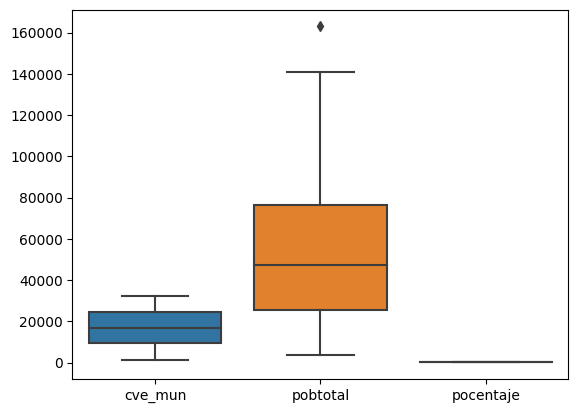

In [ ]:
# Visualiza y analiza valores atípicos en columnas numéricas
import seaborn as sns
sns.boxplot(data=Pobreza[['cve_mun', 'pobtotal', 'pocentaje']])

# Limpieza de datos inconsistentes

In [ ]:
# Trata valores duplicados
data_no_duplicates = Pobreza.drop_duplicates()

# Corrige categorías mal escritas u otros errores en columnas categóricas
Pobreza['indicador'] = Pobreza['indicador'].str.strip().str.upper()  # Ejemplo: convierte a mayúsculas y elimina espacios


# Datos limpios

In [ ]:
data_cleaned.to_csv('data_limpios.csv', index=False)

# Evolución de la incidencia de pobreza

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = {
    'cve_mun': [1001, 2002, 3003, 4002, 5030, 6002, 7101, 8019, 15033, 10005, 11015, 12029, 13048, 14039, 15106, 16053, 17007, 18017, 19039, 20067, 21114, 22014, 23001, 24028, 25006, 26030, 27004, 28041, 29033, 30087, 31050, 32056],
    'periodo': [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020],
    'pobtot': [63783,3545,5284,998,7691,1840,3169,218,2219,1013,311,4554,6819,11705,11990,26263,18147,42532,7285,281451],
    'valor': [18.23292,35.55318,39.002396,41.619103,24.606326,26.007838,37.511604,22.485228,25.762261,59.996763,27.856059,34.609246,46.890647,61.55943,66.765867,48.93943,47.989093,64.00967,42.162162,27.477477],
}

In [ ]:
df = pd.DataFrame(Pobreza)

# Calcular la variación porcentual entre años
df['Variación'] = df['periodo'] + df['pobtot'] + df['valor']

# Calcular la incidencia relativa de cada rubro en la variación
rubros = ['periodo', 'pobtot', 'valor']
for rubro in rubros:
    df[f'Incidencia_{rubro}'] = df[rubro] / df['Variación'] * 100

In [ ]:
# Gráfico de evolución de incidencia relativa
plt.figure(figsize=(10, 6))
for rubro in rubros:
    plt.plot(df['cve_mun'], df[f'Incidencia_{rubro}'], label=rubro)

plt.title('Evolución de Incidencia Relativa de Rubros de Pobreza')
plt.xlabel('cve_mun')
plt.ylabel('Incidencia Relativa (%)')
plt.legend()
plt.grid(True)
plt.show()

NameError: ignored

<Figure size 1000x600 with 0 Axes>

# Mayor a menor

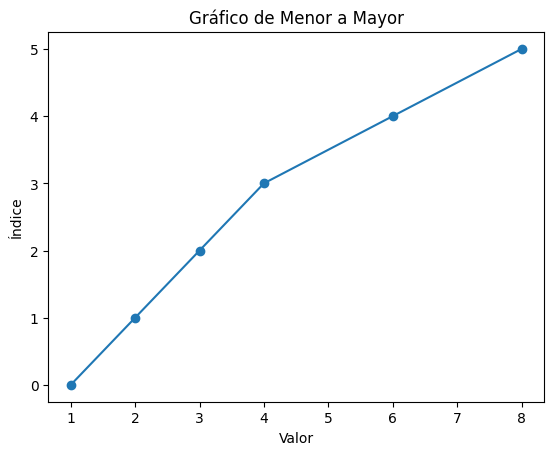

In [ ]:
import matplotlib.pyplot as plt

# Crea una lista de valores
valores = [3, 1, 6, 2, 8, 4]

# Ordena la lista de menor a mayor
valores.sort()

# Crea el gráfico con índices en el eje x
plt.plot(valores, range(len(valores)), marker='o')

# Añade etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Índice')
plt.title('Gráfico de Menor a Mayor')

# Muestra el gráfico
plt.show()

# Media, Mediana y Moda

In [ ]:
import numpy as np

In [ ]:
data = [18.23292,15.203056,18.551297,27.856059,13.661261,22.29298,37.577419,12.568904,30.530891,25.097041,29.778717,40.483203,17.067525,18.684116,38.950809,20.013152,27.646887,18.464232,11.123264,24.411754,27.575842,18.441841,35.861899,16.563641,19.737632,16.037568,33.17714,30.728624,18.185215,28.98463,20.090845,17.109408]

In [ ]:
# Calcular la media
mean = np.mean(data)
print("Media:", mean)

Media: 23.459055375000002


In [ ]:
# Calcular la mediana
median = np.median(data)
print("Mediana:", median)

Mediana: 20.051998500000003


In [ ]:
# Calcular la moda
from scipy import stats
mode = stats.mode(data)
print("Moda:", mode.mode[0])

Moda: 18.23292


<ipython-input-60-715c767cae23>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(data)


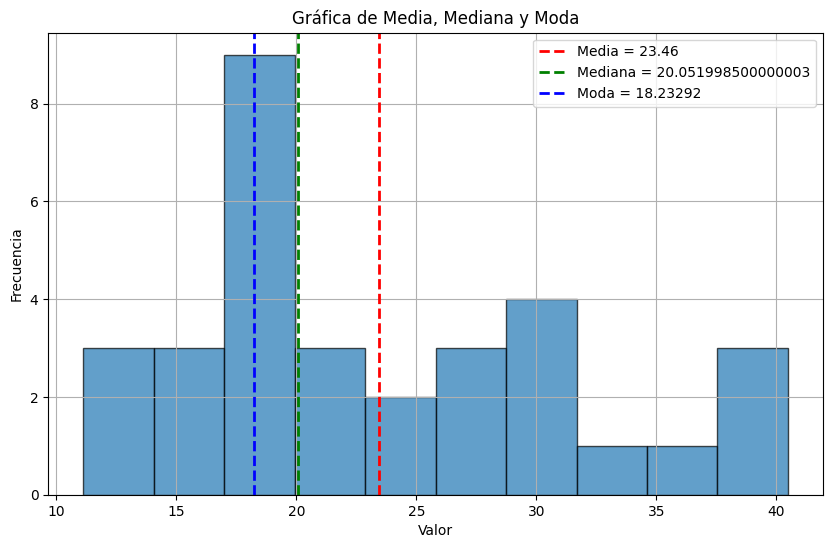

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Datos de ejemplo
data = [18.23292,15.203056,18.551297,27.856059,13.661261,22.29298,37.577419,12.568904,30.530891,25.097041,29.778717,40.483203,17.067525,18.684116,38.950809,20.013152,27.646887,18.464232,11.123264,24.411754,27.575842,18.441841,35.861899,16.563641,19.737632,16.037568,33.17714,30.728624,18.185215,28.98463,20.090845,17.109408]


# Cálculos estadísticos
mean = np.mean(data)
median = np.median(data)
mode = statistics.mode(data)

# Crear gráfica
plt.figure(figsize=(10, 6))

plt.hist(data, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Media = {mean:.2f}')
plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {median}')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=2, label=f'Moda = {mode}')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Gráfica de Media, Mediana y Moda')
plt.legend()
plt.grid(True)

plt.show()

# Grafica Gaussiana

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Genera un conjunto de datos aleatorios con una distribución normal (gaussiana)
mu = 39.951835     # Media
sigma = 38.257   # Desviación estándar
num_samples = 1000
data = np.random.normal(mu, sigma, num_samples)

In [ ]:
# Calcula la densidad de probabilidad de la distribución normal
x_range = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x_range, mu, sigma)

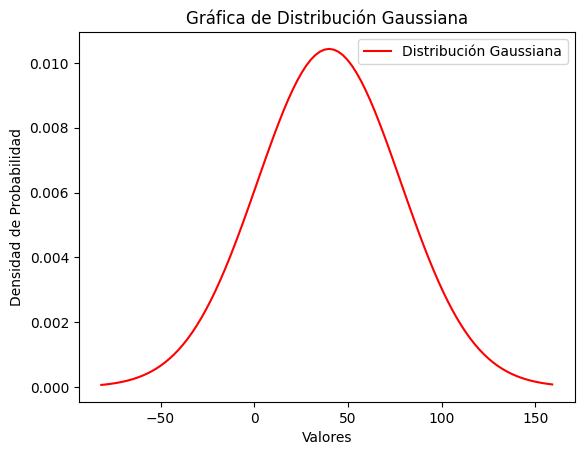

In [ ]:
# Crea la figura y los subplots
fig, ax = plt.subplots()
# Grafica la densidad de probabilidad de la distribución normal
ax.plot(x_range, pdf, color='red', label='Distribución Gaussiana')
# Agrega leyendas y etiquetas
ax.set_title('Gráfica de Distribución Gaussiana')
ax.set_xlabel('Valores')
ax.set_ylabel('Densidad de Probabilidad')
ax.legend()
# Muestra la gráfica
plt.show()

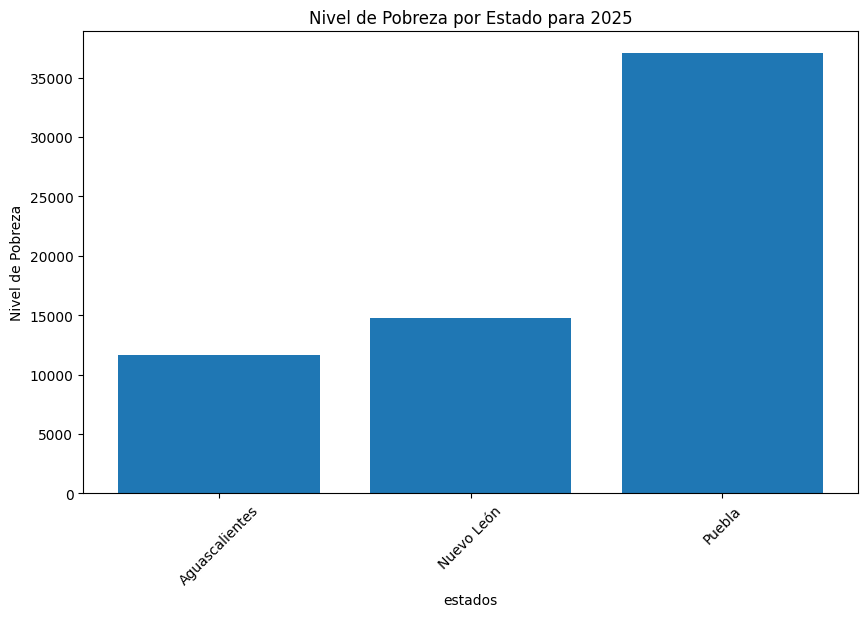

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
data = {
    'estados': ['Aguascalientes', 'Nuevo León', 'Puebla'],  # Lista de estados
    'Pobtotal': [63783, 132505, 134313],  # Población total de cada estado
    'pocentaje': [18.23292, 11.123264, 27.575842]  # Porcentaje de pobreza de cada estado
}

df = pd.DataFrame(data)

# Calcular el nivel de pobreza para el año 2025
df['Nivel_Pobreza'] = df['Pobtotal'] * df['pocentaje'] / 100

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(df['estados'], df['Nivel_Pobreza'])
plt.xlabel('estados')
plt.ylabel('Nivel de Pobreza')
plt.title('Nivel de Pobreza por Estado para 2025')
plt.xticks(rotation=45)
plt.show()


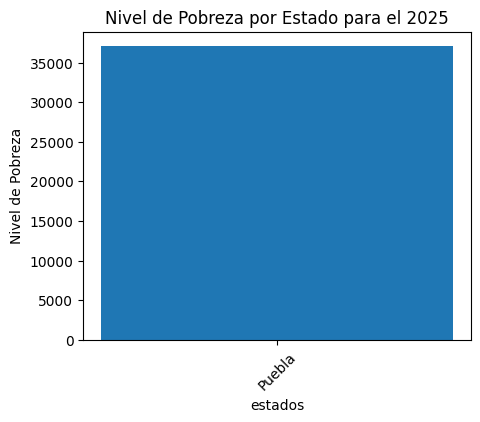

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
data = {
    'estados': ['Puebla'],  # Lista de estados
    'Pobtotal': [ 134313],  # Población total de cada estado
    'pocentaje': [ 27.575842]  # Porcentaje de pobreza de cada estado
}

df = pd.DataFrame(data)

# Calcular el nivel de pobreza para el año 2025
df['Nivel_Pobreza'] = df['Pobtotal'] * df['pocentaje'] / 100

# Graficar los resultados
plt.figure(figsize=(5, 4))
plt.bar(df['estados'], df['Nivel_Pobreza'])
plt.xlabel('estados')
plt.ylabel('Nivel de Pobreza')
plt.title('Nivel de Pobreza por Estado para el 2025')
plt.xticks(rotation=45)
plt.show()


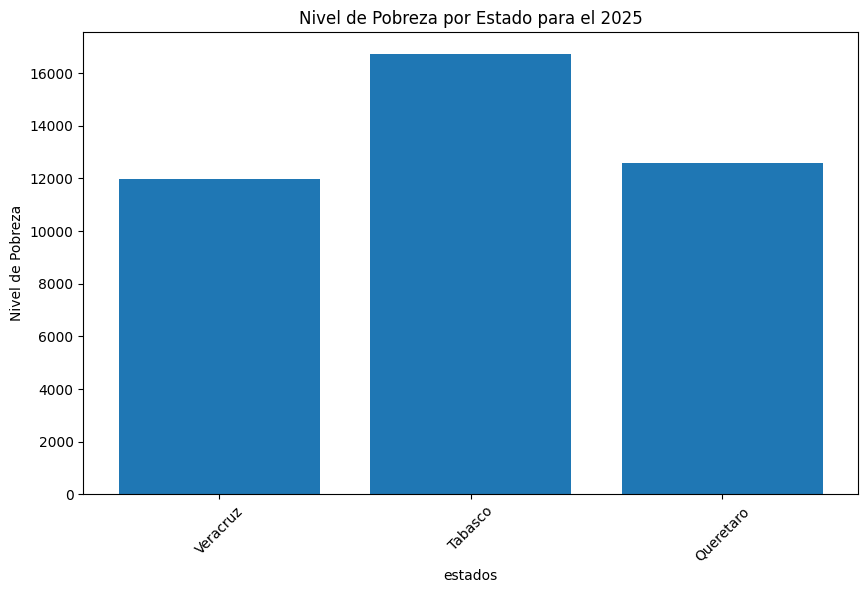

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
data = {
    'estados': ['Veracruz', 'Tabasco', 'Queretaro'],  # Lista de estados
    'Pobtotal': [41384, 50404, 68201],  # Población total de cada estado
    'pocentaje':[28.98463, 33.17714, 18.441841]  # Porcentaje de pobreza de cada estado
}

df = pd.DataFrame(data)

# Calcular el nivel de pobreza para el año 2025
df['Nivel_Pobreza'] = df['Pobtotal'] * df['pocentaje'] / 100

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(df['estados'], df['Nivel_Pobreza'])
plt.xlabel('estados')
plt.ylabel('Nivel de Pobreza')
plt.title('Nivel de Pobreza por Estado para el 2025')
plt.xticks(rotation=45)
plt.show()